In [1]:
#%run InsertsDelComparisons.ipynb

In [14]:
import import_ipynb
from InsertsDelComparisons import sorted_users, np, df, INDICES, KEYWORDS, \
    map_, pd, indices_of_first_attempts_per_user, \
        get_data_per_session, plot_users_sessions, bubble_plot_recipe, data_computation_on_groups, plot_group_at_recipe
import ast
from DataFormatting import recipes_indices

In [15]:
def print_user_recipes(index):
    print(sorted_users[index])
    a = np.where(df['user_id'] == sorted_users[index])
    a = a[0]
    for i in a:
        print(df['recipe'].iloc[i][:20], df['event_date'].values[i])
    print(map_[index])

print_user_recipes(INDICES[4][2])


5b2509947f7816000145fa13
Pasta bolognese
Ingr 2022-09-04 08:32:09.543609
Pasta bolognese
Ingr 2022-09-04 08:51:14.524511
Sausage, mash and ve 2022-09-04 08:56:44.910849
Sausage, mash and ve 2022-09-04 08:57:02.876889
Odds and ends pasta
 2022-09-04 09:01:40.320894
Odds and ends pasta
 2022-09-04 09:04:16.484970
[56, 58, 60]


In [7]:
import os
import pm4py
from pm4py.visualization.petri_net import  visualizer as pn_vis_factory
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import  algorithm as alpha_miner

def save_user_session_info_graph(csv_filepath, group_num):
    graph_data = csv_filepath
    dataframe = pd.read_csv(graph_data, sep=';')
    event_log = pm4py.format_dataframe(dataframe, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
    event_log = pm4py.convert_to_event_log(dataframe)

    new_file = 'xes_format.xes'
    pm4py.write_xes(event_log, new_file)
    log = pm4py.read_xes(new_file)
    net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(log)
    performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(event_log)
    
    try:
        pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, 'results/process mining/groupnum{n}.png'.format(n=group_num))
    except: print('user only has 1 recipe')

#pn_vis_factory(pn_vis_factory.apply(net, initial_marking, final_marking))

In [8]:
ACTIONS = [';1st recipe submitted;', ';revision;', ';second recipe submitted;']
def format_user_data(user_index, with_enumeration=False, case_id=1):
    recipe_indices = map_[user_index].copy()
    if user_index == 186: last_index_where_written = 1091
    else: last_index_where_written = indices_of_first_attempts_per_user[user_index + 1]
    recipe_indices.append(last_index_where_written)

    where_in_df = np.where(df['user_id'] == sorted_users[user_index])
    first_line = str(case_id) + ACTIONS[0] + df.iloc[where_in_df[0][0]]['event_date']

    lines = [first_line]

    for i, index in enumerate(range(recipe_indices[0]+1, recipe_indices[-1]+1)):
        j = index
        is_new_recipe = index in recipe_indices
        while not is_new_recipe:
            line = ACTIONS[1] + df.iloc[where_in_df[0][i+1]]['event_date']
            lines.append(line)
            j+=1
            if j in recipe_indices: is_new_recipe = True

        try:
            if index in recipe_indices : lines.append(ACTIONS[2] + df.iloc[where_in_df[0][i+1]]['event_date'])
        except: continue
        
    result = lines
    index = 1
    for i, line in enumerate(lines):
        j = index if with_enumeration else 1
       
        if line.startswith(ACTIONS[1]):
            result[i] = str(case_id) + line
        elif line.startswith(ACTIONS[2]):
            index+=1
            j = index if with_enumeration else 1
            second_recipe_already_submitted = False
            for l in lines[:i]:
                if ACTIONS[2] in l : second_recipe_already_submitted = True
            if second_recipe_already_submitted:
                result[i] = str(case_id) + line.replace('second', 'third')
            else : result[i] = str(case_id) + line

    return  pd.DataFrame(sorted(set(result), key=result.index), columns=['case_id;activity;timestamp'])

In [9]:
for i in range(0,5):
    dframes = []
    for j, user in enumerate(INDICES[i]):
        A = format_user_data(user_index=user, case_id=j+1)
        dframes.append(A)

    res = pd.concat(dframes)
    path = 'results/process mining/group{i}.csv'.format(i=i+1)
    res.to_csv(path, index=False)
    save_user_session_info_graph(csv_filepath=path, group_num=i+1)


C:\Users\lucam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 40/40 [00:00<00:00, 3370.20it/s]


In [10]:
from pm4py.objects.log.importer.xes import importer as xes_importer
from pm4py.algo.discovery.alpha import  algorithm as alpha_miner
from pm4py.visualization.petri_net import visualizer as pn_vis_factory

""" performance_dfg, start_activities, end_activities = pm4py.discover_performance_dfg(log)
pm4py.save_vis_performance_dfg(performance_dfg, start_activities, end_activities, 'perf_dfg2.png')



net, im, fm = alpha_miner.apply(log)
gv = pn_vis_factory.apply(net, im, fm)
pn_vis_factory.view(gv) """
print(sorted_users[INDICES[1][2]])


5b2509947f7816000145fa13


[[8, 31, 35, 41, 50, 56, 61, 69, 74, 85, 93, 100, 104, 128, 134, 182], [2, 5, 10, 14, 20, 44, 46, 55, 59, 60, 63, 84, 86, 90, 106, 107, 130, 170], [40, 51, 52, 82, 89, 91, 94, 113, 125, 161, 176, 179], [11, 13, 18, 30, 45, 57, 112, 114, 121, 147, 153, 156, 157], [0, 17, 19, 27, 32, 71, 108, 119, 122, 127, 146, 154, 158, 183]]
6154b537a93b01369670a9f5
[(735, 72), (47, 5)]
[(724, 60), (174, 26)]
[(771, 70), (85, 7)]


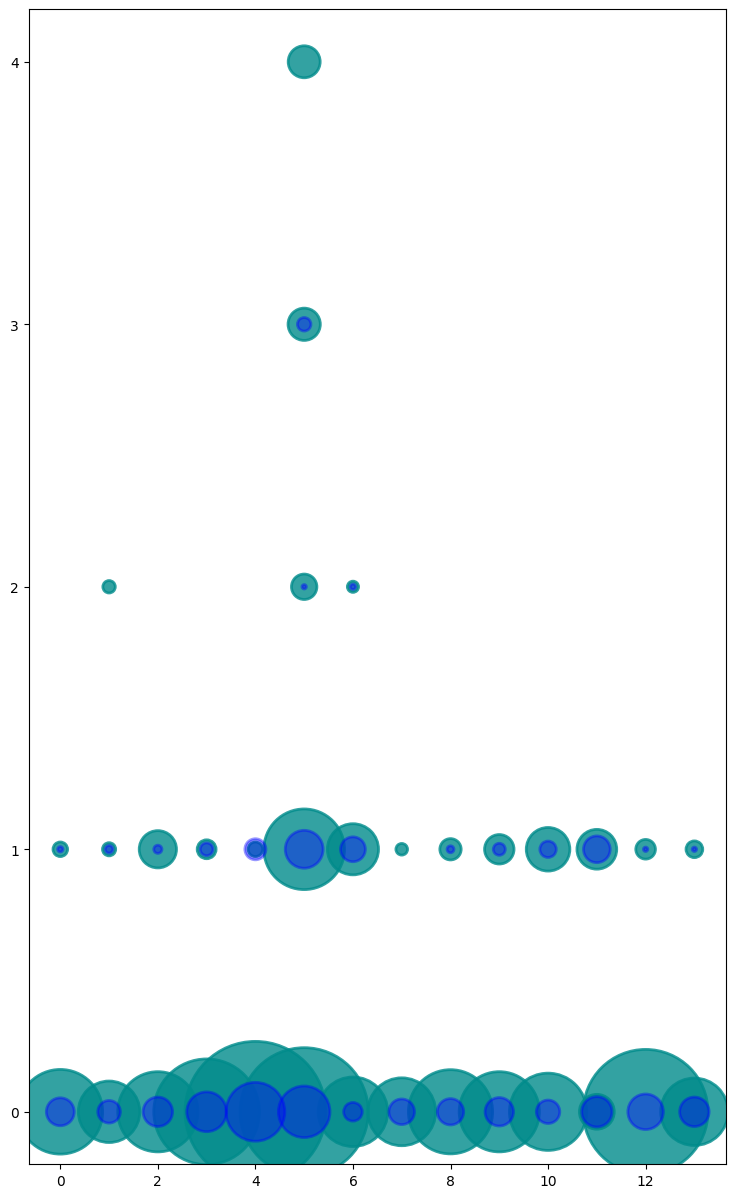

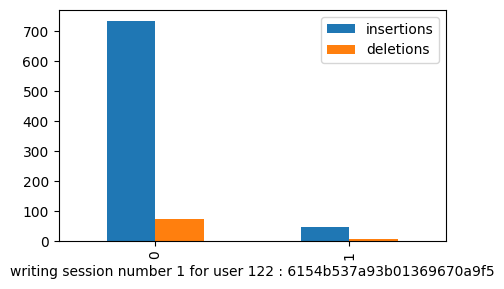

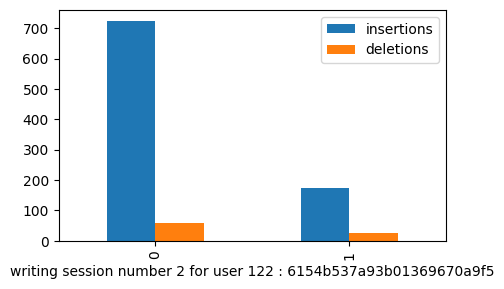

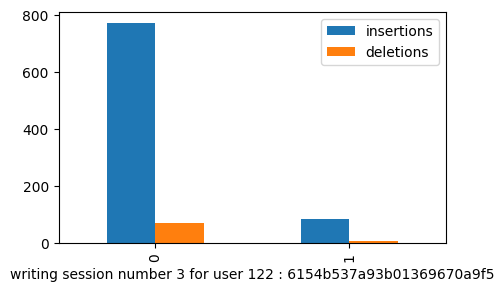

In [11]:
with_at_least_one_revision = []
for group in range(0,5):
    not_outliers = []
    for user_index in INDICES[group]:
        sessions = get_data_per_session(user_index)
        is_outlier = False
        for session in sessions:
            if len(session) < 2:
                is_outlier = True
        if not is_outlier:
            not_outliers.append(user_index)
    with_at_least_one_revision.append(not_outliers)

print(with_at_least_one_revision)

max_revisions, means, variances, avr_rev_lengths= data_computation_on_groups(0, with_at_least_one_revision)
group_characteristics = ["With Adaptive Feedback\nWith Reflective Prompts", "With Adaptive Feedback\nWithout Reflective Prompts", 
"Without Adaptive Feedback\nWith Reflective Prompts", "Without Adaptive Feedback\nWithout Reflective Prompts", "Control Group\nNo Adaptive Feedback\nNo Reflective Prompts"]
for group in range(1,6):
    text = \
    """
    Maximum number of revisions: {max}
    {mean}
    {var}
    {revision_length_mean}
    """.format(max=max_revisions[group-1], 
    mean=r'$\mu_{revisions}=%.3f$' % (means[group-1]), 
    var=r'$\sigma^2_{revisions}=%.3f$' % (variances[group-1]),
    revision_length_mean=r'$\mu_{revision lengths}=%.3f$' % (avr_rev_lengths[group-1])
    )

   # plot_group_at_recipe(group_n=group, recipe_number=0, users_groups=with_at_least_one_revision, vertical=True, \
      #  xlabel="users in group {group} , recipe number {num_recipe}".format(group=group, num_recipe=0), ylabel="revision steps", text_to_display=text, group_characteristics=group_characteristics[group-1],figsize=(7,3))


POI = with_at_least_one_revision[4][8]
bubble_plot_recipe(recipe_num=0, indices=with_at_least_one_revision[4], vertical=True, figsize=(30,5))
#plot_users_sessions(INDICES[0][0])
plot_users_sessions((POI))

In [12]:
for i in range(0,5):
    dframes = []
    for j, user in enumerate(with_at_least_one_revision[i]):
        A = format_user_data(user_index=user, case_id=j+1)
        dframes.append(A)

    res = pd.concat(dframes)
    path = 'results/process mining/lolololololol{i}.csv'.format(i=i+1)
    res.to_csv(path, index=False)
    save_user_session_info_graph(csv_filepath=path, group_num=i+1)


parsing log, completed traces :: 100%|██████████| 14/14 [00:00<00:00, 1756.04it/s]


In [13]:
import ast

df = pd.read_csv('data/keystrokes-recipes-modified.csv')
user_index = with_at_least_one_revision[0][1]
where_user_is = np.where(df['user_id'] == sorted_users[user_index])


recipe_indices = map_[INDICES[4][0]].copy()
if user_index == 186: last_index_where_written = 1091
else: last_index_where_written = indices_of_first_attempts_per_user[user_index + 1]
recipe_indices.append(last_index_where_written)


for user_index in INDICES[4][:1]:
    indices_where_written = recipe_indices[user_index]
    for index in range(recipe_indices[0], recipe_indices[-1]):
        dframe = df.iloc[index]
        written = []
        for json in ast.literal_eval(dframe['ks']):
            if json['word'] not in  KEYWORDS:
                written.append(json['word'])
    
        written = " ".join(written)
   # print(dframe['recipe'])
        print("----------------")
        print(written)
        print("============")

print(where_user_is) 

print(INDICES[4][0])

----------------
brown 1 oppoounds o of hamburger meat. drain the greaseput hamburger meat into skill with chiclkeen 1 one 16 oz chicken broth, a bag of frozen peas and carrots 9roor one canned of each0 , a tablespoon or tablespoon or so of kietketchup and worchisure v to taste. bring to a  also add garlic salt, dsakltlt, pepper, and onion powder to taste. bring to a boil.awhile this is boiling, oppeel and cut potatoes and boil them until tender with a fdorkork. drain the potatoes and put them back in the pot.combine mash the potatoes and add butter , salt and pepper, and  1 cup of heavy cream. stir the poattoatotoesatoes and set aside.once most of the liquid is gone from the meat mixture, pour the meat mixture into a greased 13x9 pan . spoospoo nn potatothe mashed potatoes over the meat mixuturepre-heat oven to 23u765 and bake for about 3445-45 muininutes or until the top of the mashed potato peaks are brown.
----------------
brown.10 2)30  40 50 60 77- ) 
----------------

----------